# A/B Testing and Multi-Arm Bandit for Data Science

Carlos Afonso, [NYC Data Science Academy](https://nycdatascience.com)

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import random

ModuleNotFoundError: No module named 'matplotlib'

## Objectives & Outline

Introduce important Data Science concepts from "scratch"

* Histogram
* Hands-on: Histogram
* A/B Testing (classic statistical method)
* Hypothesis testing, P-value
* Multi-Arm Bandit (modern generalization, reinforcement learning)

## Histogram

A graphical tool to **describe** and help understand the data

* Provides a summary of the data
* Shows the **distribution** of values in the data

Example: Dice results

### Roll a dice once

We can simulate a dice roll using the `choice` **function** from the `random` **library** (imported above).

* We pass a **list** with the dice numbers as the input to the `choice` function.

In [2]:
random.choice([1, 2, 3, 4, 5, 6])

4

Note: We can use `random.seed` to make the results reproducible (while still random)

In [3]:
random.seed(0)
print(random.choice([1, 2, 3, 4, 5, 6]))

4


In [4]:
random.seed(0)
print(random.choice([1, 2, 3, 4, 5, 6]))
print(random.choice([1, 2, 3, 4, 5, 6]))
print(random.choice([1, 2, 3, 4, 5, 6]))
print(random.choice([1, 2, 3, 4, 5, 6]))

4
4
1
3


### Roll a dice `n` times

Use a `for` **loop** to roll a (fair) dice `n` times, and record the results in the `dice_results` list.

* **Question:** If `n = 60`, how many times do you expect to get the number `3`?

In [5]:
random.seed(0)
n = 60
dice_results = []

print("Roll# | Dice#")

for i in range(n):
    result = random.choice([1, 2, 3, 4, 5, 6])
    print(f"{i+1:3} {result:7}")
    dice_results.append(result)

Roll# | Dice#
  1       4
  2       4
  3       1
  4       3
  5       5
  6       4
  7       4
  8       3
  9       4
 10       3
 11       5
 12       2
 13       5
 14       2
 15       3
 16       2
 17       1
 18       5
 19       3
 20       5
 21       6
 22       5
 23       2
 24       3
 25       1
 26       6
 27       1
 28       6
 29       3
 30       4
 31       5
 32       1
 33       3
 34       4
 35       3
 36       5
 37       6
 38       2
 39       5
 40       4
 41       4
 42       5
 43       3
 44       1
 45       5
 46       1
 47       1
 48       6
 49       4
 50       6
 51       6
 52       6
 53       1
 54       5
 55       4
 56       3
 57       2
 58       6
 59       3
 60       6


Show list with all the results:

In [9]:
print(dice_results)

[4, 4, 1, 3, 5, 4, 4, 3, 4, 3, 5, 2, 5, 2, 3, 2, 1, 5, 3, 5, 6, 5, 2, 3, 1, 6, 1, 6, 3, 4, 5, 1, 3, 4, 3, 5, 6, 2, 5, 4, 4, 5, 3, 1, 5, 1, 1, 6, 4, 6, 6, 6, 1, 5, 4, 3, 2, 6, 3, 6]


### Tally dice results

Tally the results, i.e., count how many times each of the 6 dice numbers showed up in the results:

In [10]:
print("Number   Count   Frequency   Frequency (%)")
print("-" * 42)

for dice_number in [1, 2, 3, 4, 5, 6]:
    count = dice_results.count(dice_number)
    freq = count / n
    print(f"{dice_number:3} {count:8} {freq:11.2f} {100*freq:10.0f}")

print("-" * 42)
print(f"Total {n:6} {1.00:11.2f} {100:10}")

Number   Count   Frequency   Frequency (%)
------------------------------------------
  1        9        0.15         15
  2        6        0.10         10
  3       12        0.20         20
  4       11        0.18         18
  5       12        0.20         20
  6       10        0.17         17
------------------------------------------
Total     60        1.00        100


**Important:** Frequency (or density) corresponds to **Probability**

### Histogram(s) of dice results

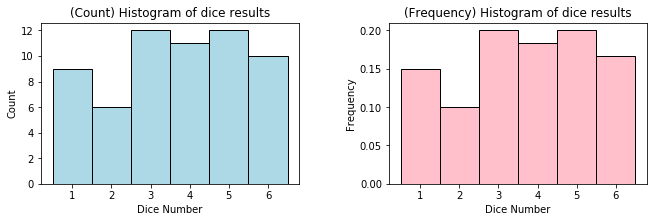

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

dice_bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

ax1.hist(dice_results, bins=dice_bins, density=False, edgecolor='black', color='lightblue')
ax2.hist(dice_results, bins=dice_bins, density=True,  edgecolor='black', color='pink')

ax1.set_title('(Count) Histogram of dice results')
ax2.set_title('(Frequency) Histogram of dice results')

ax1.set_xlabel('Dice Number')
ax2.set_xlabel('Dice Number')

ax1.set_ylabel('Count')
ax2.set_ylabel('Frequency')

fig.tight_layout(pad=4)

## Hands-on: Histogram

Suppose we rolled a dice 30 times and obtained the following results:

`[4, 4, 1, 3, 5, 4, 4, 3, 4, 3, 5, 2, 5, 2, 3, 2, 1, 5, 3, 5, 6, 5, 2, 3, 1, 6, 1, 6, 3, 4]`

Do the following tasks manually (now) and with code (home):

1. Compute the results (count) tally
2. Draw the corresponding (count) histogram

### Solution

In [12]:
dice_res = [4, 4, 1, 3, 5, 4, 4, 3, 4, 3, 5, 2, 5, 2, 3, 2, 1, 5, 3, 5, 6, 5, 2, 3, 1, 6, 1, 6, 3, 4]

# Write your solution here

## A/B Testing

**A/B test:** an experiment to compare two competing ***options*** (A, B) to determine which one is ***better***.

***Options:*** treatments (medical), designs (ad, web), products, etc

Key terms:

* **Treatment:** Something (e.g., drug) to which a subject is exposed
* **Control group:** group of subjects exposed to no treatment (or standard treatment)
* **Treatment group:** group of subjects exposed to the treatment
* **Randomization:** process of randomly assigning subjects to the two groups
* **Test statistic:** metric used to measure the effect of the treatment

**Important point:** Because we use randomization, any difference between the two groups must be due to one of two things:

* Random change in assignment of subjects
* A real difference between A and B

***General examples:***

* Testing two therapies to determine which is more effective at suppressing cancer
* Testing two prices to determine which yields a higher net profit
* Testing two web headlines to determine which produces more clicks
* Testing two web ads to determine which generates more conversions


***Specific example:*** Microsoft / Bing example with 12% lift, $100 million revenue increase ([HBR](https://hbr.org/2017/09/the-surprising-power-of-online-experiments))

### Web example introduction

Web experiment (e-commerce) results table:

|                    | Option A | Option B |
| :----------------- | -------: | --------:|
|Total               |    1,020 |      980 |
|No Conversion       |      920 |      890 |
|Conversion          |      100 |       90 |
|Conversion Rate (%) |    9.8 % |    9.2 % |

**Test statistic:** Conversion rate difference = 9.8 % - 9.2 % = 0.6 %

* It could be meaninguful in a high-volume business
* Is it (statistically) significant?

Lets assign those values to **variables**, so that we can work with them in our code/program

In [13]:
# Totals
a_total_count = 1020
b_total_count = 980

# Conversions (Successes) 
a_yes_count = 100
b_yes_count =  90
#b_yes_count =  70

# Non-conversion (Failures)
a_no_count = a_total_count - a_yes_count
b_no_count = b_total_count - b_yes_count

# Conversion rates (as percentage)
a_yes_pct = 100 * a_yes_count / a_total_count
b_yes_pct = 100 * b_yes_count / b_total_count

# Test statistic: Conversion rates difference (as percentage points)
ab_yes_pct_diff = a_yes_pct - b_yes_pct

print("Conversion Rates (%):")
print(f"    A: {a_yes_pct:.1f}")
print(f"    B: {b_yes_pct:.1f}")
print(f"  A-B: {ab_yes_pct_diff:.1f}")

Conversion Rates (%):
    A: 9.8
    B: 9.2
  A-B: 0.6


### Resampling - Permutation Test

**Resampling:** repeatedly sample values from the observed data to assess a statistic's random variability

**Permutation Test:**

* A resampling procedure used for hypothesis testing
* Process for combining two (or more) data samples together, and randomly (or exhaustively) reallocating the observations to resamples

**Permutation Test Steps:**

* **Step 1:** Combine the results from the two different groups (A and B) in a single data set (a `bag`)
    * Each conversion (success) represented as a `1` (a ball with the number `1`)
    * Each non-conversion (failure) represented as a `0` (a ball with the number `0`)
* **Step 2:** Shuffle the `bag` (containing all the data / balls)
* **Step 3:** Randomly draw (without replacement) a resample of the same size as group A (`a_total_count`)
* **Step 4:** Randomly draw (without replacement) a resample of the same size as group B (`b_total_count`)
    * All the remaining balls in the bag (after step 3) because we only have two groups
* **Step 5:** Record the test statistic for the resamples
    * Test statistic: Difference in conversion rates, as the difference in the proportion of 1s
* **Step 6:** Repeat the steps 2 to 5 `p` times to yield a permutation distribution of the test statistic
    * Each time is a different permutation
    * Perform a sufficient large number of permutations `p` (e.g., 1000)

In [12]:
random.seed(0)
#number_of_permutations = 2
number_of_permutations = 1000
ab_resample_yes_pct_diff = []

if number_of_permutations < 10:
    verbose = True
else:
    verbose = False

# Step 1: Combine all results from the two groups (A, B) in a "bag"
ones = [1] * (a_yes_count + b_yes_count)
zeros = [0] * (a_no_count + b_no_count)
bag = ones + zeros
all_set = set(range(len(bag)))
if verbose:
    print("Setup")
    print("- Step 1: Created bag (no shuffle yet)")
    print("  - Number of 1s in the bag         :", len(ones))
    print("  - Number of 0s in the bag         :", len(zeros))
    print("  - Total number of balls in the bag:", len(bag))
    print("  - Bag's first balls:", bag[:30])
    print("  - Bag's last balls :", bag[-30:])

# Step 6: Repeat steps 2 to 5 a "large" number of times
for i in range(number_of_permutations):
    
    # Step 2: Shuffle the bag
    random.shuffle(bag)
    if verbose:
        print("\nPermutation", i+1, "of", number_of_permutations)
        print("- Step 2: Shuffled bag")
        print("  - Bag's first balls:", bag[:30])
    
    # Step 3: Draw a random sample of size a_total_count
    a_set = random.sample(all_set, a_total_count)
    a_resample = [bag[i] for i in a_set]
    if verbose:
        print("- Step 3: Draw resample for group A")
        print("  - Resample size             :", len(a_resample))
        print("  - Number of 1s (conversions):", sum(a_resample))
    
    # Step 4: Draw a radom sample of size b_total_count (the reamining balls in the bag)
    b_set = all_set.difference(a_set)
    b_resample = [bag[i] for i in b_set]
    if verbose:
        print("- Step 4: Draw resample for group B")
        print("  - Resample size             :", len(b_resample))
        print("  - Number of 1s (conversions):", sum(b_resample))
    
    # Step 5: Record the difference in the proportion of 1s
    a_resample_yes_pct = 100 * (sum(a_resample) / len(a_resample))
    b_resample_yes_pct = 100 * (sum(b_resample) / len(b_resample))
    ab_diff = a_resample_yes_pct - b_resample_yes_pct
    ab_resample_yes_pct_diff.append(ab_diff)
    if verbose:
        print("- Step 5: Record difference in conversion rates")
        print(f"  - Resample A conversion rate (%): {a_resample_yes_pct:.2f}")
        print(f"  - Resample B conversion rate (%): {b_resample_yes_pct:.2f}")
        print(f"  - Difference (A - B) (%)        : {ab_diff:.2f}")

In [13]:
number_of_permutations

1000

In [14]:
print(ab_resample_yes_pct_diff[:20])

[-0.9803921568627452, -0.7803121248499405, -0.7803121248499405, -1.9807923169267703, 0.42016806722689104, -3.1812725090036027, 3.021208483393358, 0.020008003201279934, 3.6214485794317737, -1.3805522208883545, 0.22008803521408637, 1.4205682272909161, 0.6202480992396957, -1.580632252901161, 1.0204081632653068, 3.021208483393358, 0.42016806722689104, 1.0204081632653068, -0.18007202881152473, 0.42016806722689104]


In [15]:
ab_yes_pct_diff

0.6202480992396957

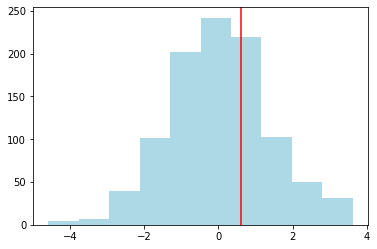

In [16]:
plt.hist(ab_resample_yes_pct_diff, color='lightblue')
plt.axvline(x = ab_yes_pct_diff, color='red')
plt.show()

In [17]:
higher_count = len(list(filter(lambda x: x >= ab_yes_pct_diff, ab_resample_yes_pct_diff)))
higher_ratio = higher_count / number_of_permutations
higher_pct = 100 * higher_ratio
print("Number of permutations                :", number_of_permutations)
print("Number of higher values               :", higher_count)
print(f"Ratio of higher values (p-value)      : {higher_ratio:.3f}")
print(f"Percent of higher values (p-value) (%): {higher_pct:.2f}")

Number of permutations                : 1000
Number of higher values               : 347
Ratio of higher values (p-value)      : 0.347
Percent of higher values (p-value) (%): 34.70


## Hypothesis testing, P-value

**Hypothesis test** (or ***significance test***): used to determine whether random chance might be responsible for an observed effect

* **Null hypothesis:** The hypothesis that chance is to blame
* **Alternative hypothesis:** Counterpoint to the null (what you hope to prove)

Important points:

* A **null hypothesis** is a logic construct embodying the notion that nothing special has happened, and any effect you observe is due to random chance.
* The **hypothesis test** assumes that the null hypothesis is true, creates a "null model" (a probability model), and tests whether the effect you observe is a reasonable outcome of that model.

**P-value:** given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual / extreme as the observed result.

**Alpha:** The probability threshold of "unusualness" (typically 0.05 or 5\%). Must be defined before the experiment

**Decision:**

* `p-value > alpha`: retain the null hypothesis - observed effect due to chance
* `p-value < alpha`: reject the null hypothesis - observed effect is real/significant

**Type I error (false positive):** Mistakenly concluding that an effect is real (when it is due to chance)

**Type II error (false negative):** Mistakenly concluding that an effect is due to chance (when it is real)

## Multi-Arm Bandit

The Multi-Arm Bandit algorithm is a modern generalization of A/B testing, which uses a **reinforcement learning** approach to not just compare but also **exploit** multiple options (A, B, C, ..., N) at the same time (in real time).

**Reinforcement learning** approach because it learns and adjusts at every step.

Multi-Arm Bandit name comes from slot machine analogy.

### Epsilon-greedy algorithm (Multi-Arm Bandit)

This algorithm has only one parameter: `epsilon`, a number between 0 and 1 (typically small)

**Epsilon-greedy algorithm for A/B test:**

* Step 1: Generate a random number between 0 and 1 (`r`), and compare it with `epsilon`
* Step 2: If `r` is smaller than `epsilon`, then flip a fair coin (50/50 probability), and:
    * If the coin is heads, show option A
    * If the coin is tails, show option B
* Step 3: Otherwise, if `r` is equal or larger then `epsilon`, then show which of the two options has had the highest response rate to date.

Note: If `epsilon = 1` we end up with the simple A/B test

**Epsilon-greedy algorithm for multiple arms/options (A, B, C, ..., N):**

* Step 1: Generate a random number between 0 and 1 (`r`), and compare it with `epsilon`
* Step 2: If `r` is smaller than `epsilon`, then randomly select one of the `N` arms/options
* Step 3: Otherwise, if `r` is equal or larger then `epsilon`, then show which of the `N` options has had the highest response rate to date.

## Learn More

Book: "Practical Statistics for Data Scientists", by Peter Bruce et al

### Bootcamps

The deadline to apply to our Summer Bootcamps is extended until **Friday, June 26**.

* [Submit your application](https://nycdatascience.com/data-science-bootcamp/?utm_source=june_2020_workshops&utm_medium=events&utm_campaign=july_2020_bootcamps&utm_content=learn-ab-testing-and-multiarm-bandit) to our 12-week Remote Live Bootcamp and learn data science in real-time.
* [Submit your application](https://nycdatascience.com/online-data-science-bootcamp/?utm_source=june_2020_workshops&utm_medium=events&utm_campaign=july_2020_bootcamps&utm_content=learn-ab-testing-and-multiarm-bandit) to our 16- or 24-week Online Bootcamp and learn data science on your own schedule.

Complete your enrollment by June 26 and receive a **10\% discount ($1,760 savings)** on your bootcamp tuition. [Get started today](https://nycdatascience.com/blog/data-science-news-and-sharing/launch-your-data-science-career-from-home-while-saving-10-1760-on-your-tuition/?utm_source=june_2020_workshops&utm_medium=events&utm_campaign=july_2020_bootcamps&utm_content=learn-ab-testing-and-multiarm-bandit).


## Q & A

Questions